# Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# Setting random seed

In [ ]:
random.seed(25)
np.random.seed(25)


# Load the dataset

In [ ]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/A2
data_path = 'imbalanced_heart_data.csv'
heart_data = pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/A2


# TODO: Explore the dataset

## TODO: Print basic information

In [ ]:
# TODO: Basic information
## Data Types
print("Data Types:")
print(heart_data.dtypes)

## Summary Statistics
print("\nSummary Statistics:")
summary = heart_data.describe()
print(summary)

Data Types:
cp           int64
ca           int64
thalach      int64
oldpeak    float64
thal         int64
target       int64
dtype: object

Summary Statistics:
               cp          ca     thalach     oldpeak        thal      target
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000
mean     0.561020    1.078324  140.845173    1.492532    2.504554    0.094718
std      0.942901    1.039048   23.077379    1.288169    0.685138    0.293092
min      0.000000    0.000000   71.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000  125.000000    0.300000    2.000000    0.000000
50%      0.000000    1.000000  143.000000    1.200000    3.000000    0.000000
75%      1.000000    2.000000  160.000000    2.400000    3.000000    0.000000
max      3.000000    4.000000  195.000000    6.200000    3.000000    1.000000


## TODO: Print the distribution of target variable

In [ ]:
# TODO: Distribution of the target variable

# Calculate the proportion of each unique value in the 'target' column
target_counts = heart_data['target'].value_counts()
target_proportions = target_counts / len(heart_data)

# Display the proportions
print("Proportions of each unique value in the 'target' column:")
print(target_proportions)

# Check if the dataset is imbalanced
if target_proportions.min() < 0.2:
    print("\nThe dataset is imbalanced, as the smallest proportion is less than 20%.")
else:
    print("\nThe dataset is not imbalanced.")

Proportions of each unique value in the 'target' column:
target
0    0.905282
1    0.094718
Name: count, dtype: float64

The dataset is imbalanced, as the smallest proportion is less than 20%.


## TODO: Plot histograms of numerical attributes

cp is right-skewed with skewness: 1.37


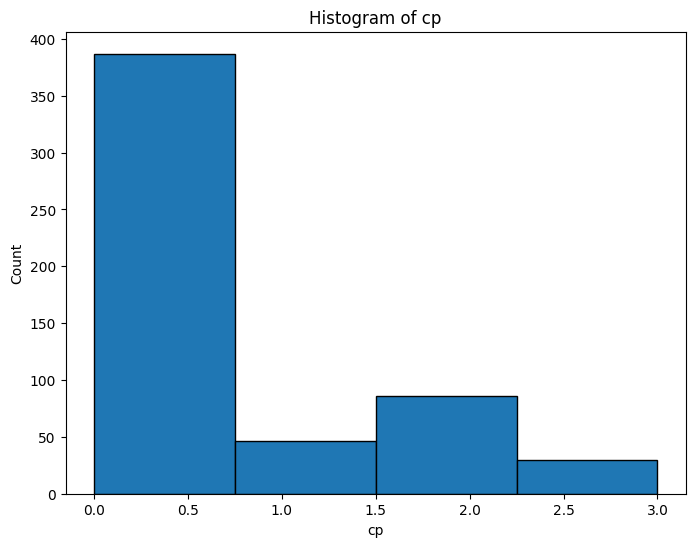

ca is right-skewed with skewness: 0.59


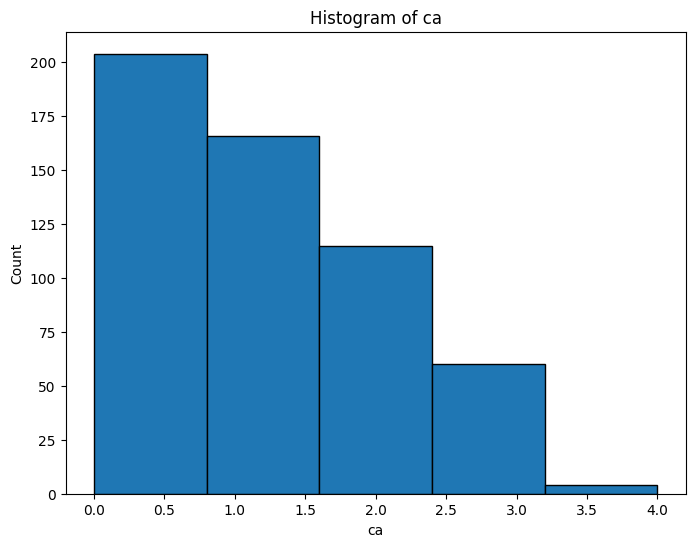

thalach is approximately symmetric with skewness: -0.33


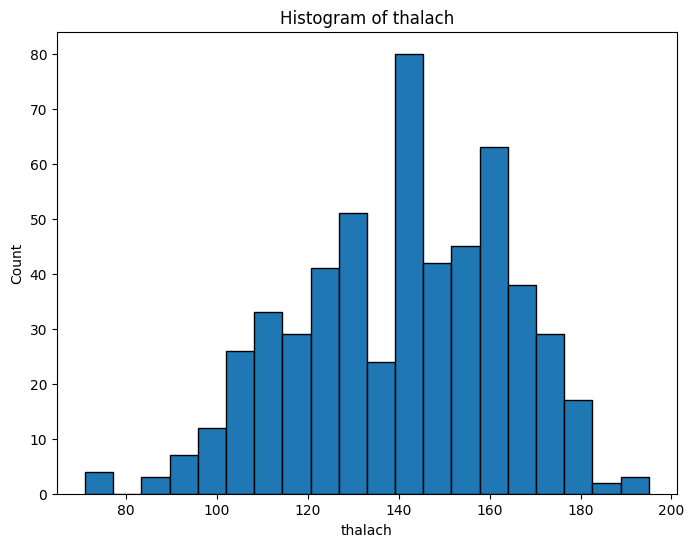

oldpeak is right-skewed with skewness: 0.79


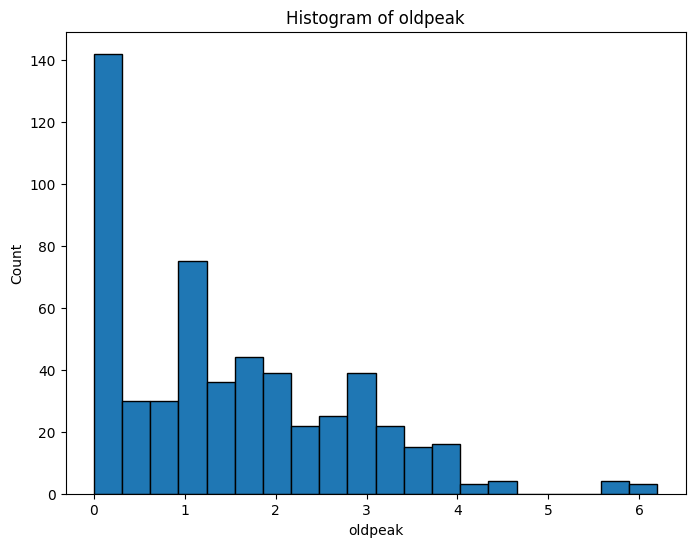

thal is left-skewed with skewness: -1.21


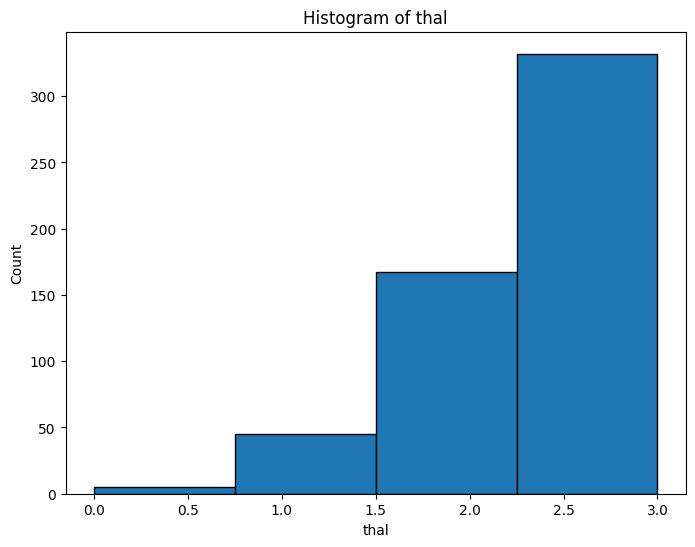

target is right-skewed with skewness: 2.78


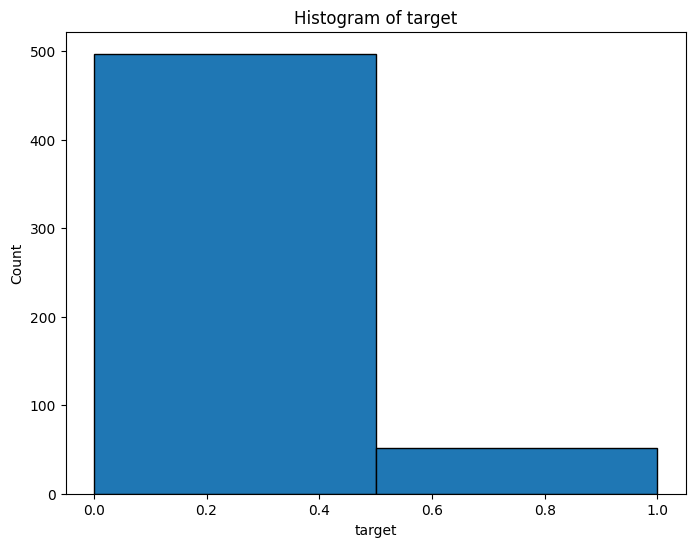

In [ ]:
# TODO: Plotting histograms for numerical attributes

## Identify numerical columns
numerical_cols = heart_data.select_dtypes(include=['int', 'float']).columns

## Plot histograms for numerical columns
for col in numerical_cols:
    ## Set the bin size based on the number of unique values
    if heart_data[col].nunique() < 20:
        bins = heart_data[col].nunique()
    else:
        bins = 20

    ## Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(heart_data[col], bins=bins, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    ## Analyze skewness
    skewness = heart_data[col].skew()
    if skewness > 0.5:
        print(f"{col} is right-skewed with skewness: {skewness:.2f}")
    elif skewness < -0.5:
        print(f"{col} is left-skewed with skewness: {skewness:.2f}")
    else:
        print(f"{col} is approximately symmetric with skewness: {skewness:.2f}")
    plt.show()

## TODO: Visualise the correlation matrix

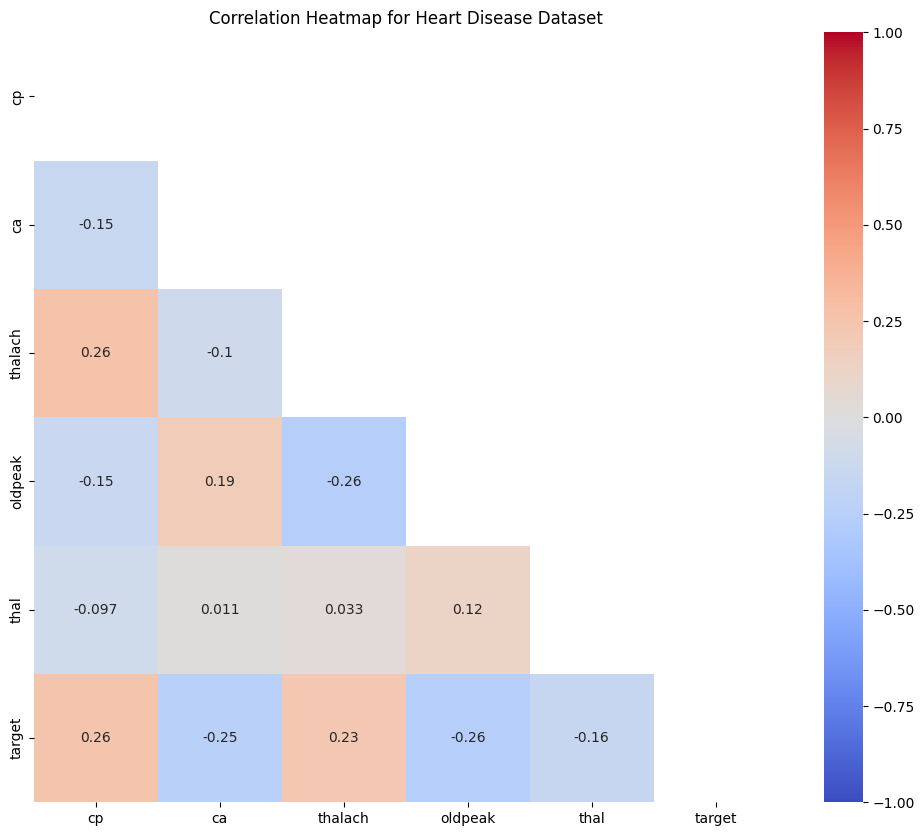

In [ ]:
# TODO: Correlation matrix

# Calculate the correlation matrix
corr_matrix = heart_data.corr()

# Create a mask to highlight the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Heart Disease Dataset')
plt.show()


# TODO: Scale the features

In [ ]:
# TODO: Scaling features

# Separate the target variable from the features
X = heart_data.drop('target', axis=1)  # Features
y = heart_data['target']  # Target variable

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Print the mean and standard deviation of the scaled features
print("Mean of scaled features:")
print(X_scaled_df.mean())
print("\nStandard deviation of scaled features:")
print(X_scaled_df.std())


Mean of scaled features:
cp         2.912060e-17
ca        -2.264936e-17
thalach   -1.132468e-16
oldpeak    9.059743e-17
thal      -6.471245e-17
dtype: float64

Standard deviation of scaled features:
cp         1.000912
ca         1.000912
thalach    1.000912
oldpeak    1.000912
thal       1.000912
dtype: float64


# TODO: Create the training and testing datasets

In [ ]:
# TODO:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=25)

# Print the shapes of the training and testing sets
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of testing set:", X_test.shape, y_test.shape)

Shape of training set: (439, 5) (439,)
Shape of testing set: (110, 5) (110,)


# TODO: Train all the models

In [ ]:
# Separate features and target variable
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)

    return train_acc, test_acc, train_cm, test_cm

# Implement the models with different hyperparameters
models = []

# KNN
models.append(('KNN Set 1', KNeighborsClassifier(n_neighbors=3, weights='uniform')))
models.append(('KNN Set 2', KNeighborsClassifier(n_neighbors=10, weights='uniform', p=2)))
models.append(('KNN Set 3', KNeighborsClassifier(n_neighbors=15, weights='distance', p=1)))

# Decision Tree
models.append(('Decision Tree Set 1', DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=25)))
models.append(('Decision Tree Set 2', DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=25)))
models.append(('Decision Tree Set 3', DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4, random_state=25)))

# Random Forest
models.append(('Random Forest Set 1', RandomForestClassifier(n_estimators=50, max_features='auto', random_state=25)))
models.append(('Random Forest Set 2', RandomForestClassifier(n_estimators=200, max_depth=10, max_features='log2', random_state=25)))
models.append(('Random Forest Set 3', RandomForestClassifier(n_estimators=350, max_depth=20, min_samples_split=3, random_state=25)))

# XGBoost
models.append(('XGBoost Set 1', xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=50, random_state=25)))
models.append(('XGBoost Set 2', xgb.XGBClassifier(learning_rate=0.15, max_depth=10, n_estimators=150, random_state=25)))
models.append(('XGBoost Set 3', xgb.XGBClassifier(learning_rate=0.25, max_depth=15, n_estimators=250, random_state=25)))

# Evaluate each model and store the results
results = []
for name, model in models:
    train_acc, test_acc, train_cm, test_cm = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append((name, train_acc, test_acc, train_cm, test_cm))

# Analyze the results and determine the best-performing model
print("Model\tTrain Acc\tTest Acc")
for name, train_acc, test_acc, train_cm, test_cm in results:
    print(f"{name}\t{train_acc:.3f}\t{test_acc:.3f}")
    print("Training Confusion Matrix:")
    print(train_cm)
    print("Testing Confusion Matrix:")
    print(test_cm)
    print("-"*50)

best_model = max(results, key=lambda x: x[2])
print(f"The best-performing model is {best_model[0]} with a testing accuracy of {best_model[2]:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Model	Train Acc	Test Acc
KNN Set 1	0.961	0.918
Training Confusion Matrix:
[[396   1]
 [ 16  26]]
Testing Confusion Matrix:
[[98  2]
 [ 7  3]]
--------------------------------------------------
KNN Set 2	0.904	0.900
Training Confusion Matrix:
[[391   6]
 [ 36   6]]
Testing Confusion Matrix:
[[99  1]
 [10  0]]
--------------------------------------------------
KNN Set 3	0.995	0.909
Training Confusion Matrix:
[[397   0]
 [  2  40]]
Testing Confusion Matrix:
[[100   0]
 [ 10   0]]
--------------------------------------------------
Decision Tree Set 1	0.916	0.936
Training Confusion Matrix:
[[380  17]
 [ 20  22]]
Testing Confusion Matrix:
[[96  4]
 [ 3  7]]
--------------------------------------------------
Decision Tree Set 2	0.982	0.991
Training Confusion Matrix:
[[397   0]
 [  8  34]]
Testing Confusion Matrix:
[[100   0]
 [  1   9]]
--------------------------------------------------
Decision Tree Set 3	0.964	0.927
Training Confusion Matrix:
[[391   6]
 [ 10  32]]
Testing Confusion Matrix: